<a href="https://colab.research.google.com/github/ibasnet30/WebTask1/blob/main/RentalHousingSystemmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Clustering and Content Based Recommendation System

## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
    - 3.3 - **[Removing Outliers](#outliers)**
4. **[Explarotary Data Analysis](#eda)**
5. **[Hierarchial Clustering](#hier)**
6. **[K Means Clustering](#kmeans)**
7. **[Density Based Clustering](#DBScan)**
8. **[Principal Component Analysis](#PCA)**
9. **[Reccomendation System](#RS)**
10. **[Application](#app)**



In [1]:
! pip install --upgrade --quiet neptune-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.7/444.7 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 825.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 4.0 MB/s eta

In [2]:
pip install neptune-client neptune-tensorflow-keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf

In [4]:
import neptune.new as neptune
from neptune.new.integrations.tensorflow_keras import NeptuneCallback

In [127]:
neptune_run = neptune.init(
     
project="ishanbasnet100/hoho",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MTFiM2M3Yi00NGJiLTQ5MTktOTg3Zi1iMTQ0NmZhYzUwMmIifQ==",
)  # your credentials

<ipython-input-127-6bd3e03c70e0>:1: NeptuneDeprecationWarning: `init` is deprecated, use `init_run` instead. We'll end support of it in `neptune-client==1.0.0`. For details, see https://docs.neptune.ai/setup/neptune-client_1-0_release_changes
  neptune_run = neptune.init(


https://app.neptune.ai/ishanbasnet100/hoho/e/HOH-1


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [128]:
import neptune.new as neptune
model = neptune.init_model(
    name="Prediction model",
    key="MOD", 
    project="ishanbasnet100/hoho", 
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MTFiM2M3Yi00NGJiLTQ5MTktOTg3Zi1iMTQ0NmZhYzUwMmIifQ==", # your credentials
)

https://app.neptune.ai/ishanbasnet100/hoho/m/HOH-MOD
Remember to stop your model once you’ve finished logging your metadata (https://docs.neptune.ai/api/model#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [129]:
model_version = neptune.init_model_version(
    model="HOH-MOD",
    project="ishanbasnet100/hoho", 
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MTFiM2M3Yi00NGJiLTQ5MTktOTg3Zi1iMTQ0NmZhYzUwMmIifQ==", # your credentials
)

https://app.neptune.ai/ishanbasnet100/hoho/m/HOH-MOD/v/HOH-MOD-1
Remember to stop your model_version once you’ve finished logging your metadata (https://docs.neptune.ai/api/model_version#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


<a id="lib"></a>
## 1. Import Libraries

In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
# plt.ylim(-100, 2500)
plt.show()

plt.rcParams['figure.figsize']=[12,8]

<a id="about"></a>
## 2. About the Dataset
##### AREA_TYPE : The type of the area where the property is located
##### AVAILABILITY : Whether the property is available currently or not
##### LOCATION : Location where the property is situtated
##### SIZE : Number of Bedrooms
##### SOCIETY : The type of society where the property is located
##### TOTAL_SQFT : Total Square feet of the property
##### BATH : Number of Bathrooms
##### BALCONY : Number of Balconies
##### PRICE : Price of the property in Lakhs

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [9]:
pwd

'/content'

In [10]:
df=pd.read_csv('/content/sample_data/RentalHousing.csv')
df.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [11]:
df.tail()
print(df.society)

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13312    ArsiaEx
13313        NaN
13314    Mahla T
13315    SollyCl
13316        NaN
Name: society, Length: 13317, dtype: object


In [12]:
df.shape
print(df.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13287 non-null  object 
 1   availability  13287 non-null  object 
 2   location      13286 non-null  object 
 3   size          13271 non-null  object 
 4   society       7807 non-null   object 
 5   total_sqft    13287 non-null  float64
 6   bath          13214 non-null  float64
 7   balcony       12679 non-null  float64
 8   price         13287 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.5+ KB



## 3.2 Analysing Missing Values

In [14]:
df.isnull().sum()

area_type         30
availability      30
location          31
size              46
society         5510
total_sqft        30
bath             103
balcony          638
price             30
dtype: int64

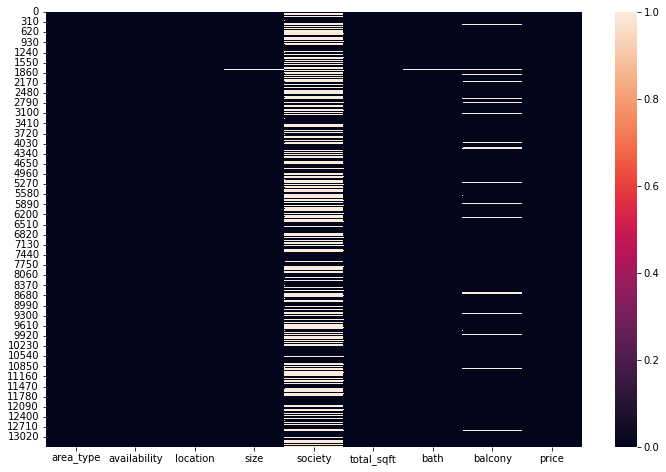

In [15]:
sns.heatmap(df.isnull())

In [16]:
(df.isnull().sum()/len(df))*100

area_type        0.225276
availability     0.225276
location         0.232785
size             0.345423
society         41.375685
total_sqft       0.225276
bath             0.773447
balcony          4.790869
price            0.225276
dtype: float64

## Categorical Variables

In [17]:
#40% of the data is missing so droping the column
df.drop('society',axis=1,inplace=True)
print(df.dtypes)


area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object


In [18]:
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)


In [19]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)

In [20]:
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()


0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: object

In [21]:
df.isnull().sum() 


area_type         0
availability      0
location          0
size             46
total_sqft       30
bath            103
balcony         638
price            30
dtype: int64

## Numerical Variables

In [22]:
df_cat=df.select_dtypes(object)
df_cat.head(3)

,area_type,availability,location
0,Super built-up Area,0,Electronic City Phase II
1,Plot Area,1,Chikka Tirupathi
2,Built-up Area,1,Uttarahalli


In [23]:
df_num=df.select_dtypes(np.number)
print(df_num)


       size  total_sqft  bath  balcony   price
0       2.0      1056.0   2.0      1.0   39.07
1       4.0      2600.0   5.0      3.0  120.00
2       3.0      1440.0   2.0      3.0   62.00
3       3.0      1521.0   3.0      1.0   95.00
4       2.0      1200.0   2.0      1.0   51.00
...     ...         ...   ...      ...     ...
13312   5.0      3453.0   4.0      0.0  231.00
13313   4.0      3600.0   5.0      NaN  400.00
13314   2.0      1141.0   2.0      1.0   60.00
13315   4.0      4689.0   4.0      1.0  488.00
13316   1.0       550.0   1.0      1.0   17.00

[13317 rows x 5 columns]


In [24]:
imputer = KNNImputer()

# If you tell the Imputer that you want the mean of all the values
# in the column to be used to replace all the NaNs in that column, the Imputer has to calculate the mean first.
# fit on the dataset
imputer.fit(df_num)

# transform the dataset 
#  to add a new column containing the groups  into the DataFrame.
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)
print(df_num_impute.isnull().sum())
# print(df_num_impute)

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


In [25]:
df=pd.concat([df_cat,df_num_impute],axis=1)


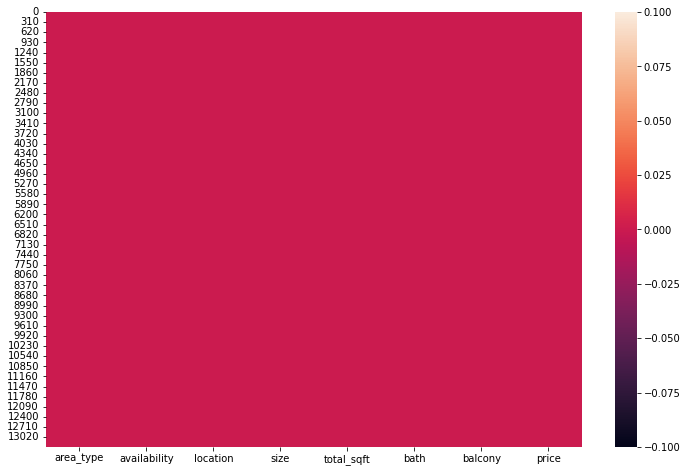

In [26]:
sns.heatmap(df.isnull())

In [27]:
(df.isnull().sum()/len(df))*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

<a id="outliers"></a>
## 3.3 Removing Outliers

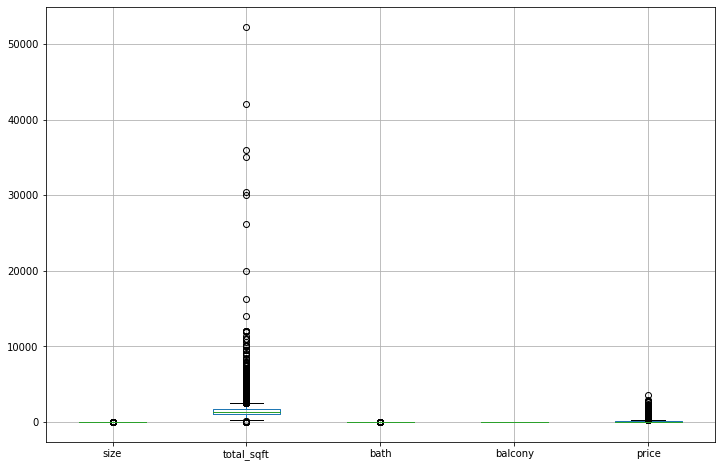

In [28]:
df.boxplot()

In [29]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [30]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR
print(IQR)

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]




size            1.0
total_sqft    576.0
bath            1.0
balcony         1.0
price          70.0
dtype: float64


<ipython-input-30-4b197c6ee1c9>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]


In [31]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


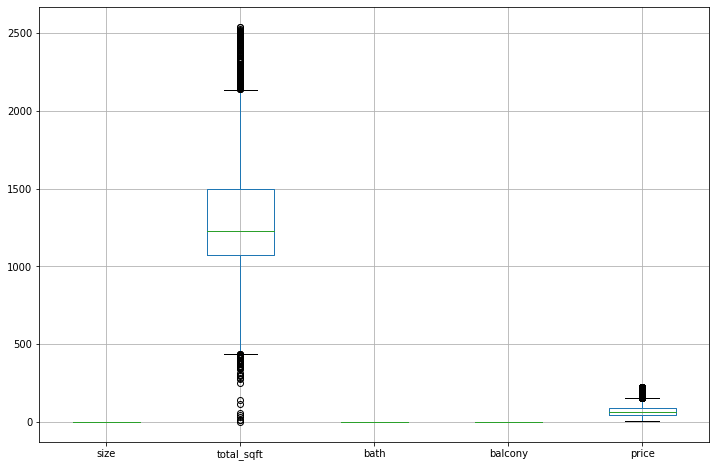

In [32]:
df.boxplot()


In [33]:
df.shape

(11120, 8)

<a id="eda"></a>
## 4.EDA

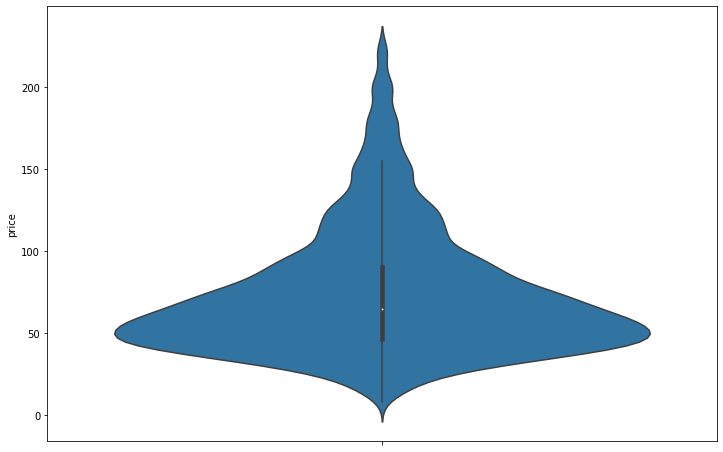

In [34]:
sns.violinplot(y = df.price)

Text(0, 0.5, 'Availability of Rooms')

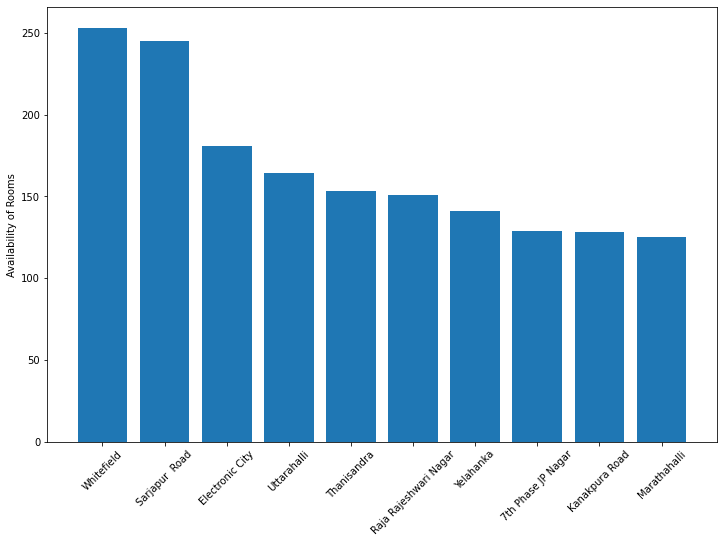

In [35]:
plt.bar(x=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Availability of Rooms')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


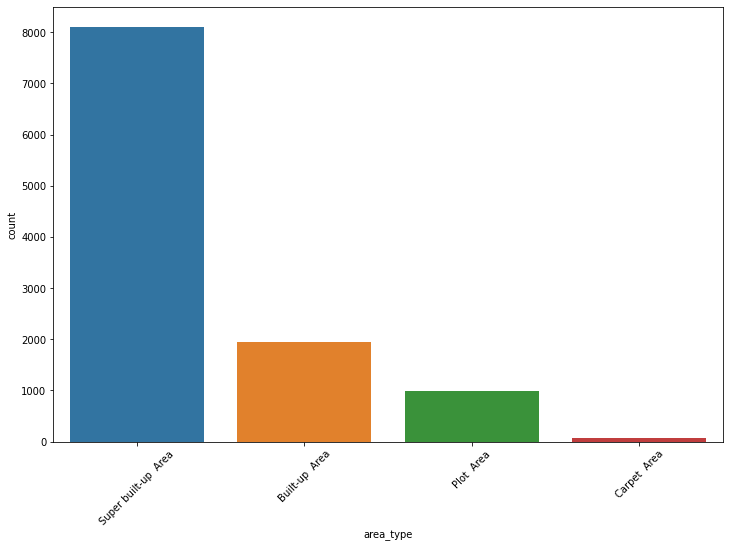

In [36]:
sns.countplot(df.area_type)
# print(df.area_type)
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


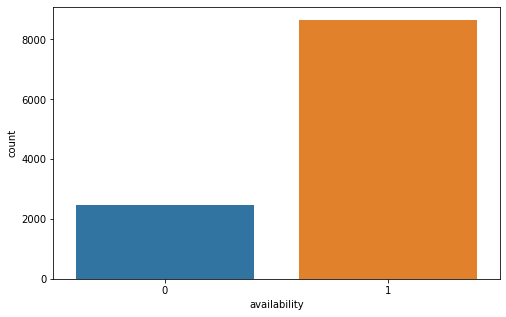

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(df.availability)
plt.show()

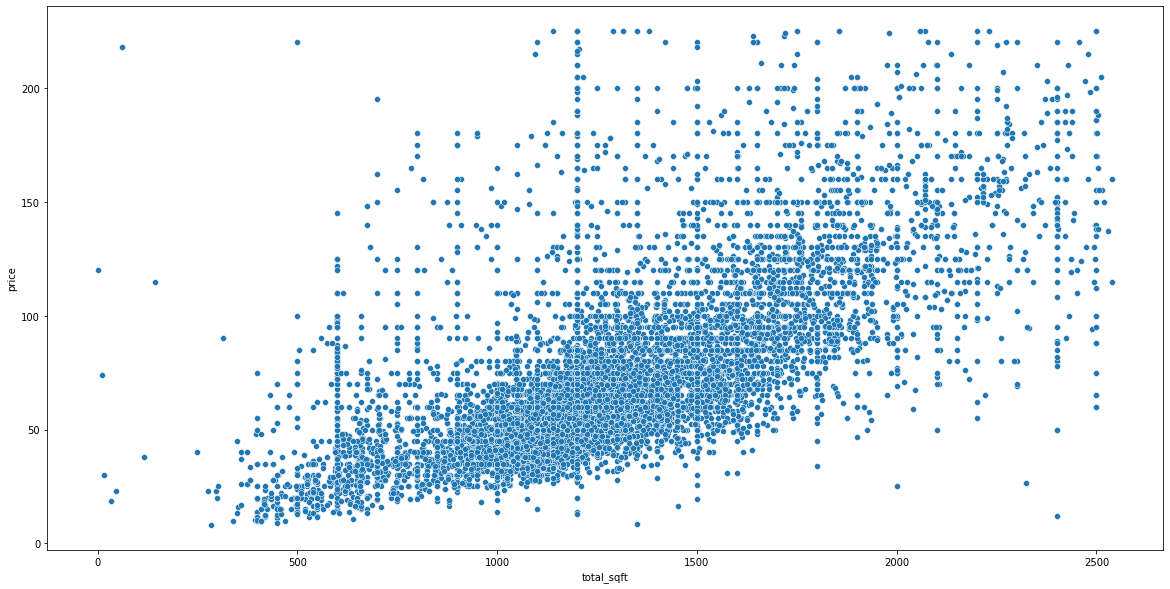

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="total_sqft", y="price", data=df)
plt.show()

Text(0.5, 0, 'Number of Bedrooms')

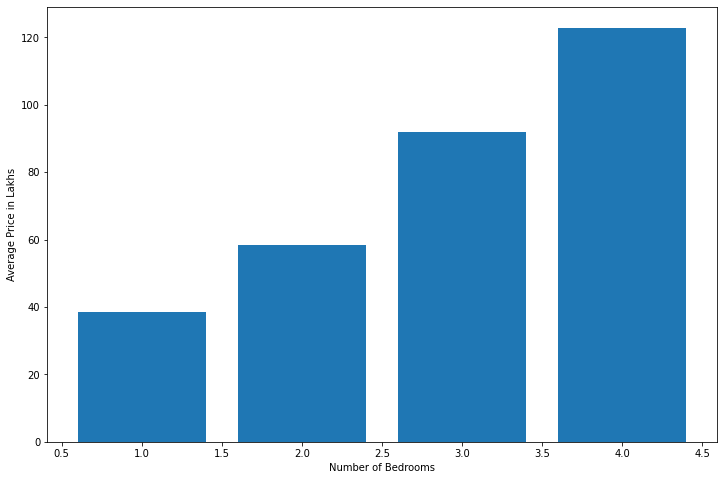

In [39]:
df10 = df.copy()
df10['size'] = np.round(df10['size'])
plt.bar(x=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Average Price in Lakhs')
plt.xlabel('Number of Bedrooms')

In [40]:
# Costliest locations in Bangalore

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

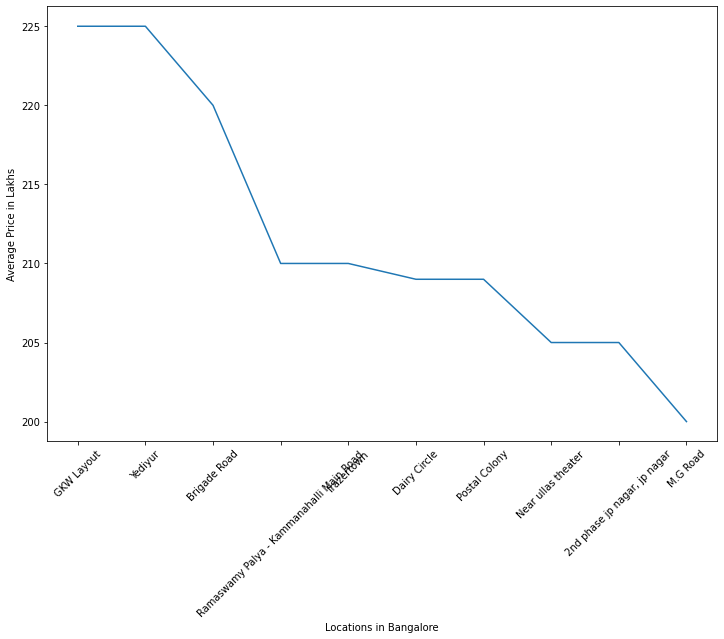

In [41]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations in Bangalore')
plt.ylabel('Average Price in Lakhs')
plt.xticks(rotation=45)

In [42]:
# Costliest Per sq.ft price in bglore


In [43]:
df['per_sqft'] = df['price']/df['total_sqft'] 
print(df.dtypes)

area_type        object
availability     object
location         object
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
per_sqft        float64
dtype: object


Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

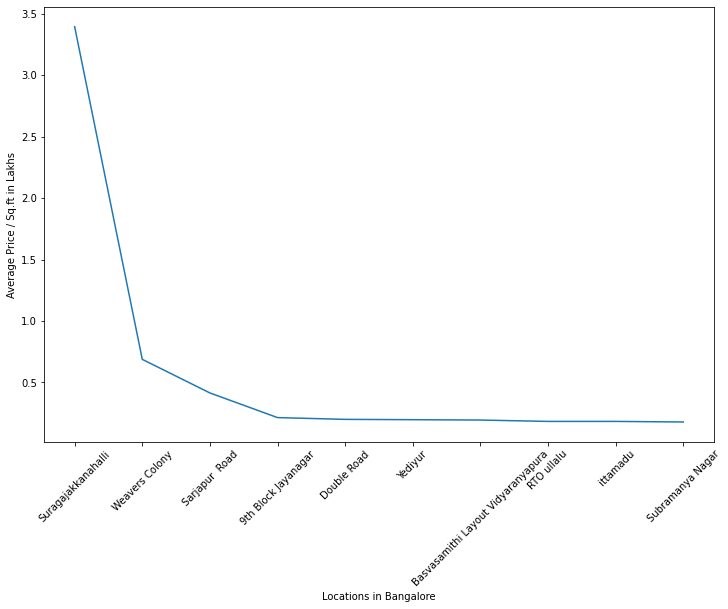

In [44]:
plt.plot(df.groupby(by='location')['per_sqft'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations in Bangalore')
plt.ylabel('Average Price / Sq.ft in Lakhs')

In [45]:
df = df.drop('per_sqft',axis=1)

In [46]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(),annot=True,cbar=False)
# plt.show()


## Standardisation


In [47]:
df.head(9)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00
8,Super built-up Area,1,Marathahalli,3.0,1310.0,3.0,1.0,63.25
10,Super built-up Area,0,Whitefield,3.0,1800.0,2.0,2.0,70.00
12,Super built-up Area,1,7th Phase JP Nagar,2.0,1000.0,2.0,1.0,38.00
13,Built-up Area,1,Gottigere,2.0,1100.0,2.0,2.0,40.00


In [48]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()


In [49]:
df.head(2)


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00


In [50]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()


,index,size,total_sqft,bath,balcony,price
0,0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515
1,1,0.837003,0.386558,-0.440965,1.862747,-0.306717
2,2,0.837003,0.599901,1.063850,-0.715699,0.552174
3,3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013
4,4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364


In [51]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,Super built-up Area,0,Electronic City Phase II
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,Built-up Area,1,Uttarahalli
2,0.837003,0.599901,1.063850,-0.715699,0.552174,Super built-up Area,1,Lingadheeranahalli
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,Super built-up Area,1,Kothanur
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,Super built-up Area,1,Whitefield


## Encoding


In [52]:
# Reference Table For Displaying Reason for Selecting
data_encoded_refernce=pd.get_dummies(df,columns=['area_type','location'])
data_encoded_refernce.head(105)

,availability,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,2.0,1170.0,2.0,1.0,38.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,3.0,1282.0,2.0,2.0,68.52,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
125,1,2.0,1050.0,2.0,1.0,34.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,1,3.0,1600.0,3.0,2.0,65.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,2.0,945.0,2.0,1.0,54.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['area_type','location'])
data_encoded_scaled.head(7)

,size,total_sqft,bath,balcony,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.837003,0.599901,1.063850,-0.715699,0.552174,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.837003,0.044155,1.063850,-0.715699,-0.274183,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0.837003,1.334750,-0.440965,0.573524,-0.098501,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<a id="hier"></a>
# 5.Hierarchical Clustering

In [54]:
d1 = data_encoded_scaled.copy()

In [55]:
data_cluster=data_encoded_refernce.copy()

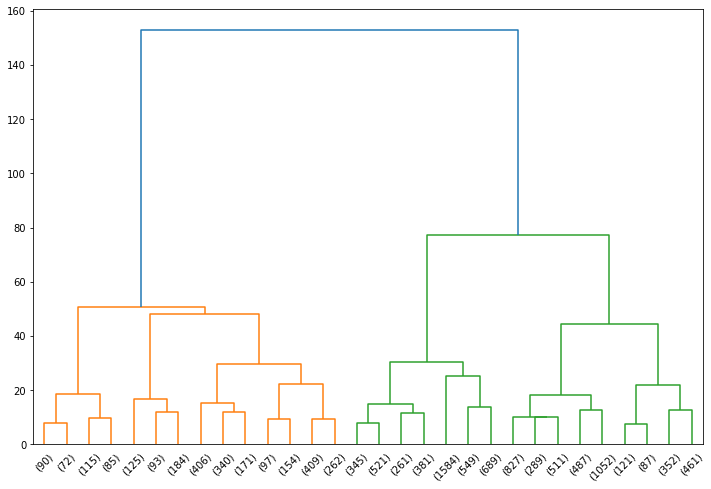

In [56]:
cls=d1[['total_sqft','price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [57]:
cluster=cut_tree(mergings,n_clusters=3)

In [58]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [59]:
cluster_cut.value_counts()

1    4330
0    4187
2    2603
dtype: int64

In [60]:
d1['cluster']=cluster

In [61]:
data_cluster['cluster']=cluster

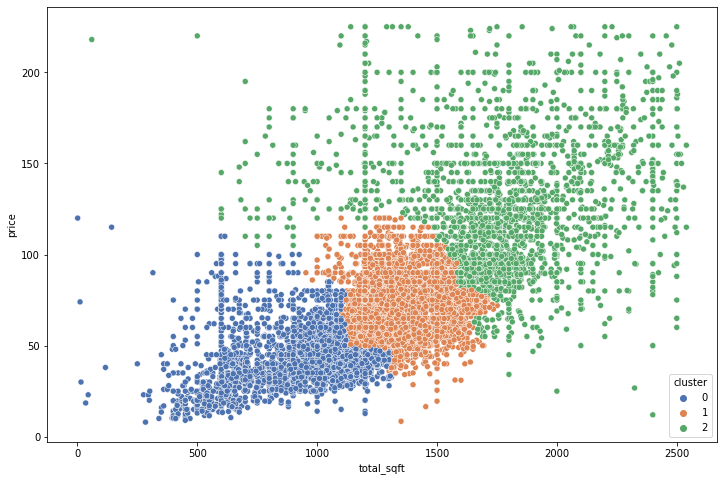

In [62]:
sns.scatterplot(y=df.price,x=df['total_sqft'],hue=data_cluster['cluster'],palette='deep')

<a id="kmeans"></a>
# 6.KMEANS Clustering

In [63]:
#Inertia measures how well a dataset was clustered by K-Means. gives sse

ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)


In [64]:
# # plt.scatter(cls.total_sqft, cls.price)
# print(cls)
# Here SSD is SUM of  Squared error
# ssd
# SSE is the sum of the squared differences
# between each observation and its group's mean. It can be used as a measure of
# variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0.


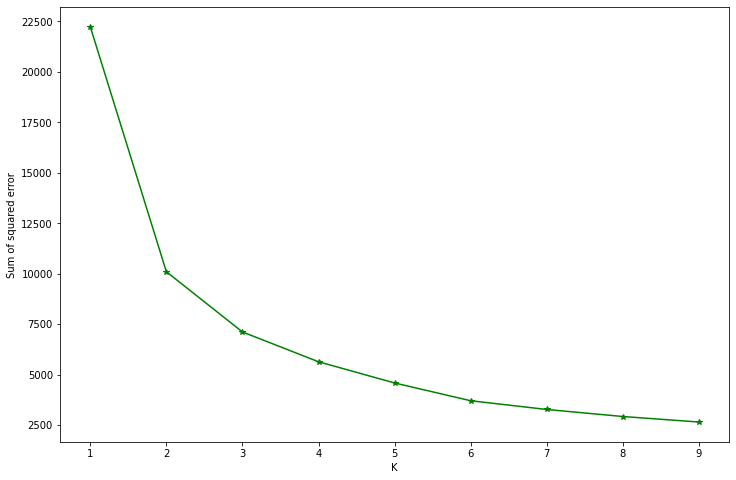

In [65]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(range(1,10),ssd,marker='*',color='g')

In [66]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

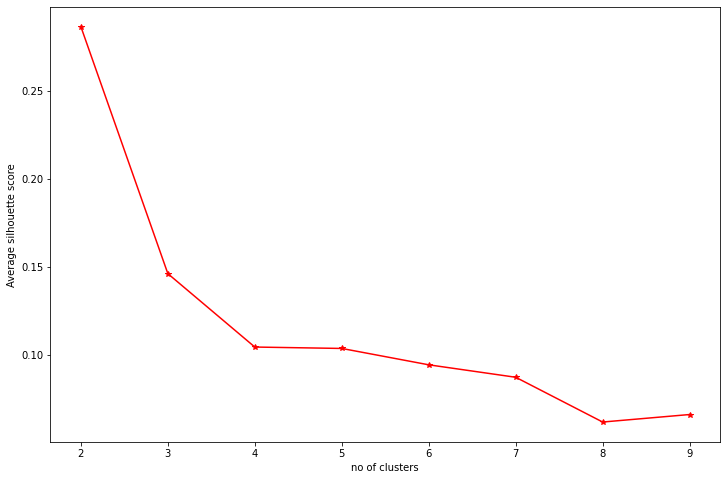

In [67]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [68]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()	

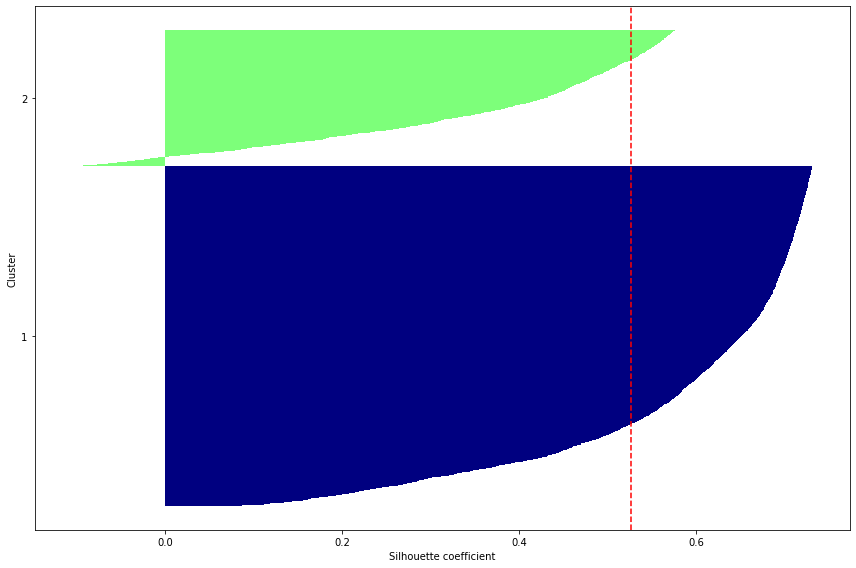

In [69]:
svisualizer(cls,2)
# The dashed line indicates the mean silhouette coefficient.

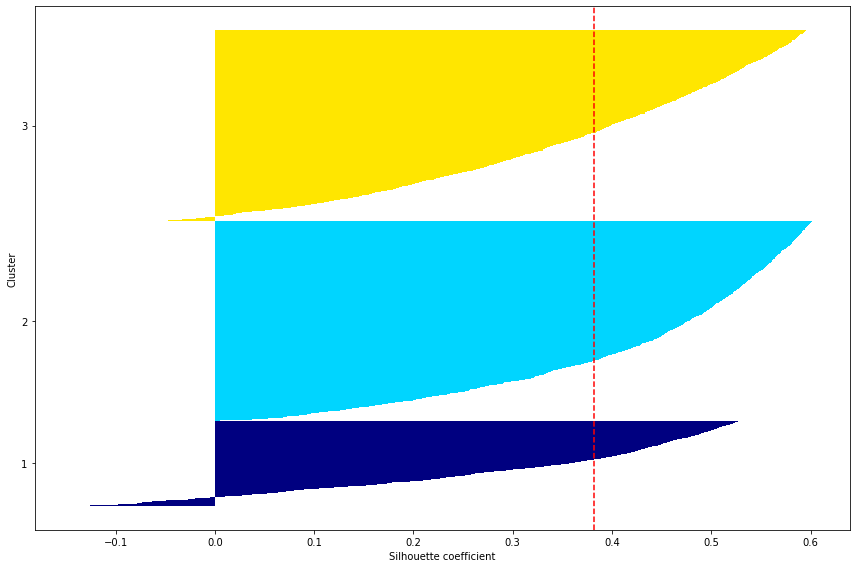

In [70]:
svisualizer(cls,3)

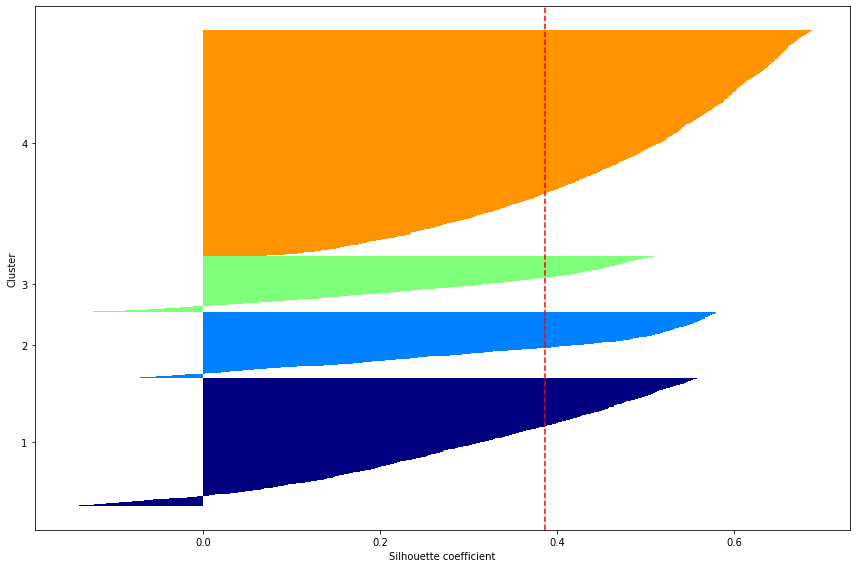

In [71]:
svisualizer(cls,4)

In [72]:
# random_sstate=10 means;; identify 10 cluster
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
# data_cluster.head(100)

In [73]:
# cluster_kmeans

In [74]:
df3 = data_cluster.iloc[:,[0,1,2,3,4,5,1119]]

In [75]:
df4 = df3.groupby(by='kmeans_cluster')
df4[['size','bath','balcony','total_sqft','price']].mean()

,size,bath,balcony,total_sqft,price
kmeans_cluster,,,,,
0,2.341520,2.159438,1.534669,1225.221968,65.278472
1,3.049944,2.966886,1.916830,1809.807419,112.709475
2,1.849394,1.758223,1.070398,750.521968,45.934325


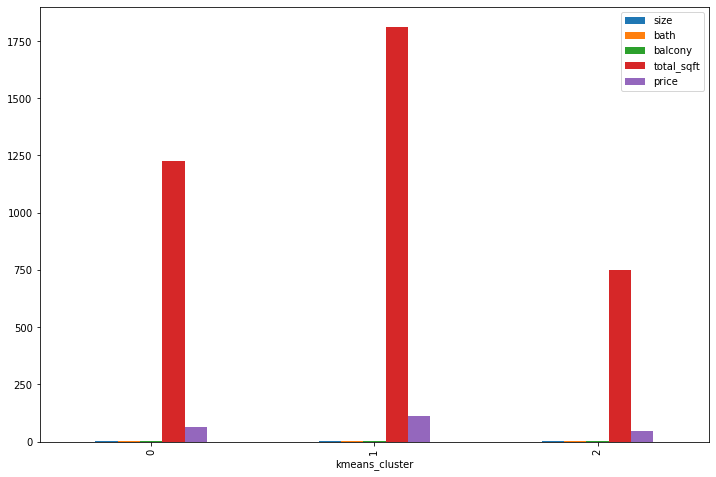

In [76]:
df4[['size','bath','balcony','total_sqft','price']].mean().plot.bar()
plt.show()

In [77]:
# ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
# Number of times the k-means algorithm is run with different centroid seeds. 
# The final results is the best output of n_init consecutive runs in terms of inertia.
# Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).
# Maximum number of iterations of the k-means algorithm for a single run.
# Relative tolerance with regards to Frobenius norm of the difference in 
# the cluster centers of two consecutive iterations to declare convergence.


def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

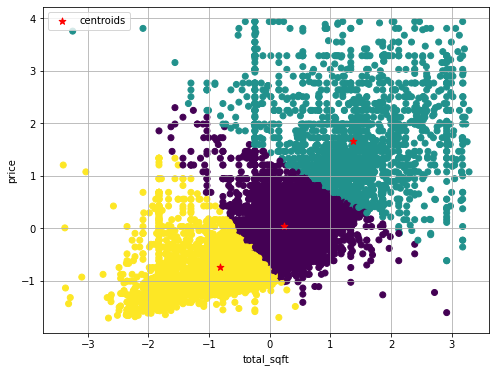

In [78]:
cluster_plot(cls,3)

<a id="DBScan"></a>
### 7.DBSCAN

In [79]:
from sklearn.cluster import DBSCAN

In [80]:
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

 0    11075
-1       29
 3        7
 1        6
 2        3
dtype: int64

In [81]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    11091
-1       29
dtype: int64

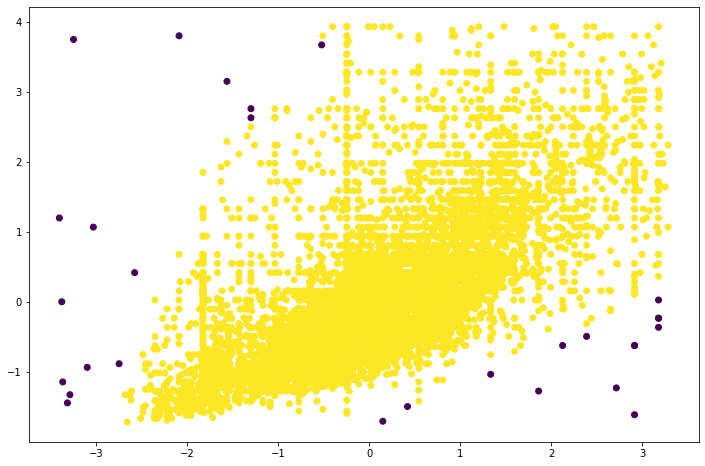

In [82]:
plt.scatter(cls['total_sqft'],cls['price'],c=lbl)

<a id="PCA"></a>
## 8.Principal Component Analysis(PCA)

In [83]:
# to overcome overfitting problem
from sklearn.decomposition import PCA

In [84]:
d2 = data_num_scaled.drop(['index'],axis=1)

In [85]:
d2.head()

,size,total_sqft,bath,balcony,price
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515
1,0.837003,0.386558,-0.440965,1.862747,-0.306717
2,0.837003,0.599901,1.063850,-0.715699,0.552174
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364


In [86]:
# cumsum  Returns the cumulative sum of the elements along a given axis.
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(d2)

print(np.cumsum(pca.explained_variance_ratio_*100))

[ 61.26419718  78.95134173  89.64037079  95.897461   100.        ]


In [87]:
# The n_components argument will define the number of components that we want to reduce the features to.
pca=PCA(n_components=2)
pca.fit_transform(d2)

print(pca.explained_variance_ratio_*100)


[61.26419718 17.68714455]


In [88]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
size,0.492645,0.092128
total_sqft,0.490447,0.025868
bath,0.503375,0.094173
balcony,0.250660,-0.946288
price,0.447823,0.294133


In [89]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-1.432366,0.293985
1,0.709523,-1.807326
2,1.309959,1.032485
3,-1.107301,0.395125
4,-1.297575,0.293561
...,...,...
11115,-0.750676,-0.851249
11116,-0.117787,0.587876
11117,2.405020,-1.264107
11118,-1.078616,0.460003


In [90]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

In [91]:
#cluster_kmeans=model.fit_predict(data_pca).reshape(-1,1)

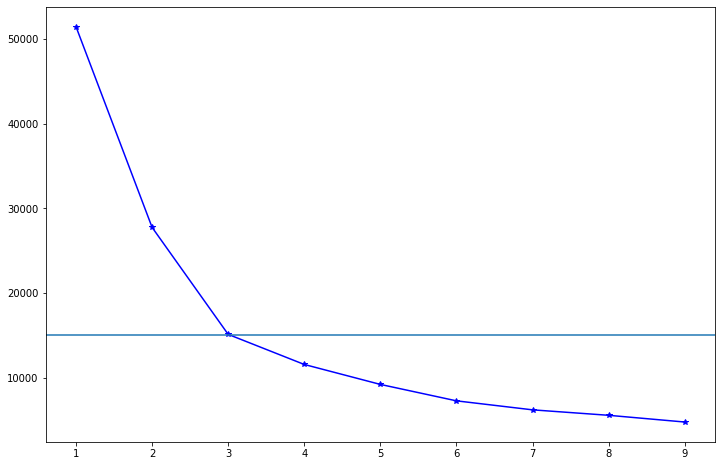

In [92]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1,10),ssd,marker='*',color='b')
plt.axhline(15000)
plt.show()

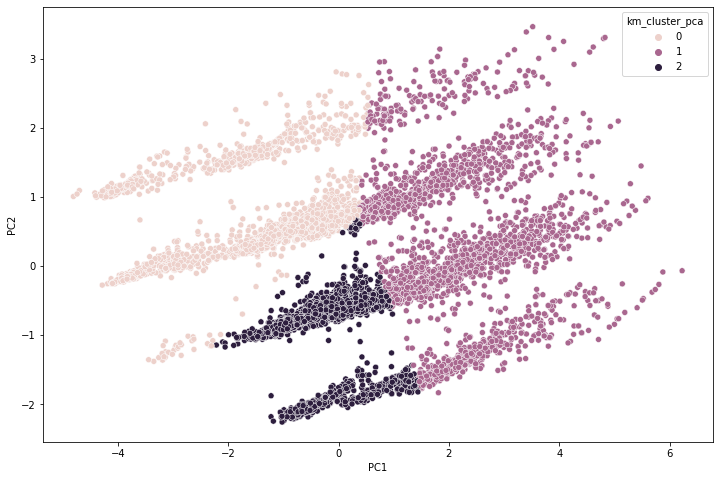

In [93]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

In [94]:
# data_encoded_scaled
import time
from sklearn import metrics
import pickle

In [95]:
def save_object(obj, filename):
  filename="pickle\\" + filename+ ' .pk1'
  pickle.dump(obj, open(filename, 'wb'))

In [96]:
save_object(data_encoded_scaled, 'finalmodel')

<a id="RS"></a>
# 9.Recommendation Systems

In [97]:
model=NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

NearestNeighbors(metric='cosine')

In [98]:
selected=5

In [99]:
data_encoded_scaled.head(5)

,size,total_sqft,bath,balcony,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.837003,0.599901,1.063850,-0.715699,0.552174,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data_encoded_scaled.iloc[selected].values[0:8]

array([0.8370033825666194, 0.04415549899175878, 1.0638495402003687,
       -0.7156992001052467, -0.27418284101187806, 1, 0, 0], dtype=object)

In [101]:
# What does Kneighbors return?
# Returns indices of and distances to the neighbors of each point
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=4)
index
# print(index)
# print(dist)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[    5, 10726,  4773,  1117]])

In [102]:
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([    5, 10726,  4773,  1117])]

In [103]:
data_encoded_refernce = data_encoded_refernce.reset_index()
data_encoded_refernce = data_encoded_refernce.drop('index',axis=1)

## Example 1

In [104]:
# Apartment user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,availability,size,total_sqft,bath,balcony,price,area_type_Super built-up Area,location_Marathahalli
5,1,3.0,1310.0,3.0,1.0,63.25,1,1


## Example 2

In [105]:
# Similar Reccomendations
# The columns property returns the label of each column in the DataFrame.
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,availability,size,total_sqft,bath,balcony,price,area_type_Super built-up Area,location_Marathahalli
5,1,3.0,1310.0,3.0,1.0,63.25,1,1
10726,1,3.0,1310.0,3.0,1.0,63.25,1,1
4773,1,3.0,1435.0,3.0,1.0,73.00,1,1
1117,1,3.0,1610.0,3.0,1.0,90.00,1,1


In [106]:
# df['availability'] = df['availability'].astype(object)

In [107]:
selected=125

data_encoded_scaled.iloc[selected].values[0:8]

dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index
suggest=[]
for x in index:
    suggest.append(x)
suggest

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[array([ 125, 5036, 5034, 1399, 6970, 2793])]

In [108]:
# Apartment user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,size,total_sqft,bath,balcony,price,area_type_Super built-up Area,location_Electronic City Phase II
125,2.0,1020.0,2.0,1.0,30.6,1,1


In [109]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,size,total_sqft,bath,balcony,price,area_type_Super built-up Area,location_Electronic City Phase II
125,2.0,1020.0,2.0,1.0,30.60,1,1
5036,2.0,1000.0,2.0,1.0,28.88,1,1
5034,2.0,1000.0,2.0,1.0,28.88,1,1
1399,2.0,1000.0,2.0,1.0,28.88,1,1
6970,2.0,1020.0,2.0,1.0,27.43,1,1
2793,2.0,1065.0,2.0,1.0,30.75,1,1


The Reccomendations given to the user are of apartments in the same location has similar number of bedrooms,balconies and bathrooms and available at a similar Price Tag.


In [110]:

df_input=pd.DataFrame(data_num_scaled.iloc[:, 0:5])
df_input

,index,size,total_sqft,bath,balcony
0,0,-0.649410,-0.624846,-0.440965,-0.715699
1,1,0.837003,0.386558,-0.440965,1.862747
2,2,0.837003,0.599901,1.063850,-0.715699
3,3,-0.649410,-0.245570,-0.440965,-0.715699
4,4,-0.649410,-0.324586,-0.440965,-0.715699
...,...,...,...,...,...
11115,11115,-0.649410,-0.082270,-0.440965,0.573524
11116,11116,0.837003,0.136341,-0.440965,-0.715699
11117,11117,0.837003,1.110871,1.063850,1.862747
11118,11118,-0.649410,-0.400968,-0.440965,-0.715699


In [111]:
df_target = pd.DataFrame(data_num_scaled.iloc[:, 5],columns=['price'])

In [112]:

df_target.shape

(11120, 1)

In [113]:

df_target

,price
0,-0.903515
1,-0.306717
2,0.552174
3,-0.593013
4,-0.931364
...,...
11115,-0.697121
11116,-0.436851
11117,0.994632
11118,-0.358771


In [216]:

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
df_scaled_input = df_input

# print(df_scaled_input)

In [236]:
df_scaled_input

,index,size,total_sqft,bath,balcony
0,0,-0.649410,-0.624846,-0.440965,-0.715699
1,1,0.837003,0.386558,-0.440965,1.862747
2,2,0.837003,0.599901,1.063850,-0.715699
3,3,-0.649410,-0.245570,-0.440965,-0.715699
4,4,-0.649410,-0.324586,-0.440965,-0.715699
...,...,...,...,...,...
11115,11115,-0.649410,-0.082270,-0.440965,0.573524
11116,11116,0.837003,0.136341,-0.440965,-0.715699
11117,11117,0.837003,1.110871,1.063850,1.862747
11118,11118,-0.649410,-0.400968,-0.440965,-0.715699


In [218]:
df_target

,price
0,-0.903515
1,-0.306717
2,0.552174
3,-0.593013
4,-0.931364
...,...
11115,-0.697121
11116,-0.436851
11117,0.994632
11118,-0.358771


In [237]:
from sklearn.model_selection import train_test_split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df_scaled_input, df_target, test_size = 0.30, random_state = 5)
print("Training data Split (Train & Test)")
print(df_input_train.shape)
print(df_input_test.shape)

print("Target data Split (Train & Test)")
print(df_target_train.shape)
print(df_target_test.shape)

Training data Split (Train & Test)
(7784, 5)
(3336, 5)
Target data Split (Train & Test)
(7784, 1)
(3336, 1)


Build the Keras classifier to predict

In [238]:

from keras.models import Sequential
from keras.layers import Dense

In [239]:

model = Sequential()
model.add(Dense(30, input_dim=5, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

plotting keras model


In [240]:
from keras.utils.vis_utils import plot_model

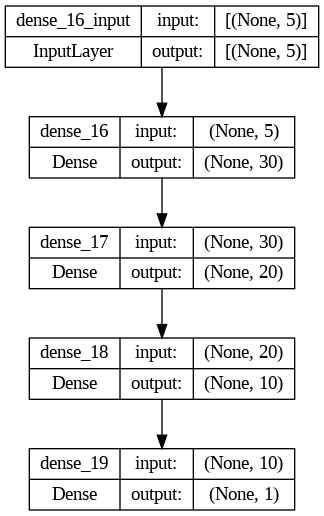

In [241]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [242]:

params = {"lr": 0.001, "momentum": 0.5, "epochs": 10, "batch_size": 500}


In [243]:
import tensorflow as tf
     

In [244]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=params["lr"],
)


In [245]:

neptune_cbk = NeptuneCallback(run=neptune_run, base_namespace="training")

In [246]:
for epoch in range(10):
    neptune_run["train/loss"].log(0.9 ** epoch)

neptune_run["eval/f1_score"] = 0.66

In [248]:
model.compile(
    optimizer=optimizer, loss="binary_crossentropy"
)



In [249]:
history = model.fit(df_input_train, df_target_train, 
                    epochs=params['epochs'], 
                    batch_size=params["batch_size"],
                    callbacks=[neptune_cbk],
                    verbose=1)

Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 0.2411
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0065


In [189]:
history
     

In [253]:
history.history.keys()

dict_keys(['loss'])

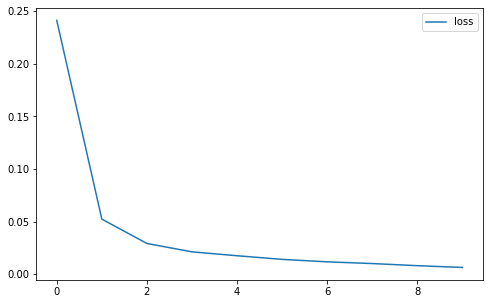

In [254]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [256]:

loss = history.history['loss']
     

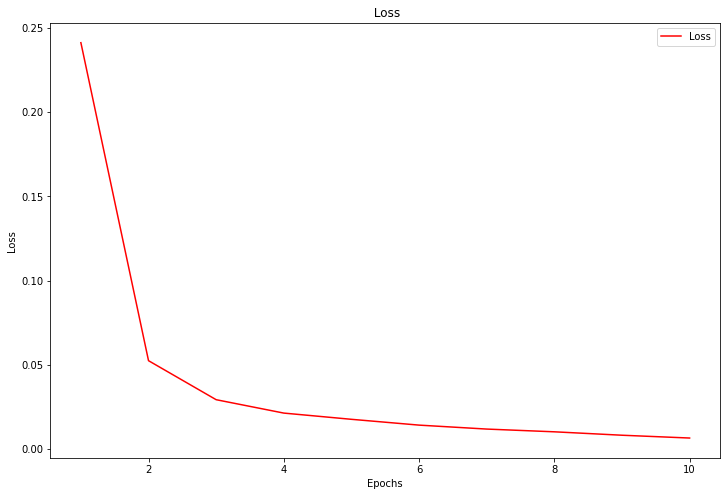

In [258]:

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Loss', color="red")
plt.title(' Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()
     

In [261]:

model.save('model/housing.bin')

In [262]:
!ls -l model

total 4
drwxr-xr-x 4 root root 4096 Jan 28 05:11 housing.bin


Mean error

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [264]:
house_price_dataset = data_num

In [265]:
house_price_dataset

,size,total_sqft,bath,balcony,price
0,2.0,1056.0,2.0,1.0,39.07
2,3.0,1440.0,2.0,3.0,62.00
3,3.0,1521.0,3.0,1.0,95.00
4,2.0,1200.0,2.0,1.0,51.00
5,2.0,1170.0,2.0,1.0,38.00
...,...,...,...,...,...
13309,2.0,1262.0,2.0,2.0,47.00
13310,3.0,1345.0,2.0,1.0,57.00
13311,3.0,1715.0,3.0,3.0,112.00
13314,2.0,1141.0,2.0,1.0,60.00


In [266]:
house_price_dataframe= house_price_dataset

In [267]:
house_price_dataframe.shape

(11120, 5)

In [268]:
# statistical measures of the dataset
house_price_dataframe.describe()

,size,total_sqft,bath,balcony,price
count,11120.000000,11120.000000,11120.000000,11120.000000,11120.000000
mean,2.436897,1293.235476,2.293036,1.555140,73.784563
std,0.672790,379.687208,0.664564,0.775696,38.423399
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1075.000000,2.000000,1.000000,46.280000
50%,2.000000,1230.000000,2.000000,2.000000,64.500000
75%,3.000000,1500.000000,3.000000,2.000000,90.000000
max,4.000000,2540.000000,4.000000,3.000000,225.000000


In [269]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [270]:
print(X)
print(Y)

       size  total_sqft  bath  balcony
0       2.0      1056.0   2.0      1.0
2       3.0      1440.0   2.0      3.0
3       3.0      1521.0   3.0      1.0
4       2.0      1200.0   2.0      1.0
5       2.0      1170.0   2.0      1.0
...     ...         ...   ...      ...
13309   2.0      1262.0   2.0      2.0
13310   3.0      1345.0   2.0      1.0
13311   3.0      1715.0   3.0      3.0
13314   2.0      1141.0   2.0      1.0
13316   1.0       550.0   1.0      1.0

[11120 rows x 4 columns]
0         39.07
2         62.00
3         95.00
4         51.00
5         38.00
          ...  
13309     47.00
13310     57.00
13311    112.00
13314     60.00
13316     17.00
Name: price, Length: 11120, dtype: float64


In [271]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [272]:
print(X.shape, X_train.shape, X_test.shape)

(11120, 4) (8896, 4) (2224, 4)


In [273]:
# loading the model
model = XGBRegressor()

In [274]:
# training the model with X_train
model.fit(X_train, Y_train)

[05:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [275]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [146]:
print(training_data_prediction)

[ 63.751877  52.519997  47.80952   46.580418  65.382935  98.13002
  58.002342  75.43224   47.48046   62.210793  26.785973  71.87108
  49.19708   49.097267  71.74418   47.48046  121.916725  85.83195
 127.373795 151.7041    50.029987  82.34059   56.909916  65.69466
 105.33968   87.816986  47.80952   49.19708   49.702633  48.36921
 117.2462    52.815098  70.84464   73.68616   47.48046   63.996704
  73.47312   58.117508  83.80703   85.83195   85.069595  87.22416
  71.87108  156.3678    73.47312   71.87108   65.31585  102.30211
  90.27756   47.80952   58.002342  42.513184  56.31377   47.660786
 110.93198   96.24901   70.11009  105.345955 152.324     34.781067
  71.24188   88.328964  54.88803   46.545822  91.78778   61.455875
  62.086376  50.35524  123.68972   48.62966   66.04807   49.702633
  52.519997  65.48742   67.85704   52.815098  54.88803   57.412262
  47.80952   46.545822  20.859444  65.638664  78.98116  111.877754
  73.25802   46.779236  73.68616   93.54493  110.024    110.93198
 11

In [276]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6018786941026533
Mean Absolute Error :  17.040431845953208


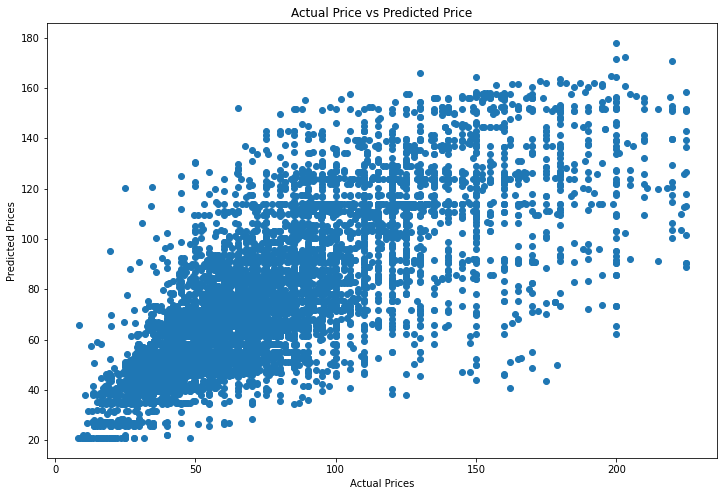

In [281]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [279]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [282]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5428934404598929
Mean Absolute Error :  17.744628098811745
